## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [5]:
import os
import tensorflow as tf
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = tf.keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from tensorflow.keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = tf.keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.1,0.25,0.5]

In [11]:
results = {}
for drop in Dropout_EXP:
    tf.keras.backend.clear_session()
    print("Experiment with drop_out = %.6f" % (drop))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drop_out-%s" % str(drop)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with drop_out = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
___________________________________________________

50000/50000 [==============================] - 8s 157us/sample - loss: 1.1836 - acc: 0.5755 - val_loss: 1.3255 - val_acc: 0.5315
Epoch 43/50
50000/50000 [==============================] - 7s 149us/sample - loss: 1.1759 - acc: 0.5766 - val_loss: 1.3492 - val_acc: 0.5236
Epoch 44/50
50000/50000 [==============================] - 8s 153us/sample - loss: 1.1702 - acc: 0.5791 - val_loss: 1.3498 - val_acc: 0.5288
Epoch 45/50
50000/50000 [==============================] - 8s 159us/sample - loss: 1.1668 - acc: 0.5778 - val_loss: 1.3331 - val_acc: 0.5340
Epoch 46/50
50000/50000 [==============================] - 7s 148us/sample - loss: 1.1613 - acc: 0.5823 - val_loss: 1.3284 - val_acc: 0.5332
Epoch 47/50
50000/50000 [==============================] - 8s 162us/sample - loss: 1.1546 - acc: 0.5867 - val_loss: 1.3403 - val_acc: 0.5285
Epoch 48/50
50000/50000 [==============================] - 8s 157us/sample - loss: 1.1499 - acc: 0.5829 - val_loss: 1.3153 - val_acc: 0.5385
Epoch 49/50
50000/50000 [

50000/50000 [==============================] - 9s 182us/sample - loss: 1.5453 - acc: 0.4425 - val_loss: 1.5041 - val_acc: 0.4680
Epoch 40/50
50000/50000 [==============================] - 9s 177us/sample - loss: 1.5428 - acc: 0.4458 - val_loss: 1.5113 - val_acc: 0.4686
Epoch 41/50
50000/50000 [==============================] - 9s 177us/sample - loss: 1.5396 - acc: 0.4474 - val_loss: 1.5028 - val_acc: 0.4665
Epoch 42/50
50000/50000 [==============================] - 9s 176us/sample - loss: 1.5313 - acc: 0.4503 - val_loss: 1.5059 - val_acc: 0.4662
Epoch 43/50
50000/50000 [==============================] - 9s 177us/sample - loss: 1.5445 - acc: 0.4447 - val_loss: 1.5333 - val_acc: 0.4604
Epoch 44/50
50000/50000 [==============================] - 9s 178us/sample - loss: 1.5319 - acc: 0.4473 - val_loss: 1.4987 - val_acc: 0.4708
Epoch 45/50
50000/50000 [==============================] - 9s 182us/sample - loss: 1.5286 - acc: 0.4488 - val_loss: 1.5157 - val_acc: 0.4524
Epoch 46/50
50000/50000 [

Epoch 37/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9765 - acc: 0.2445 - val_loss: 2.0180 - val_acc: 0.2425
Epoch 38/50
50000/50000 [==============================] - 7s 146us/sample - loss: 1.9699 - acc: 0.2456 - val_loss: 2.0466 - val_acc: 0.2616
Epoch 39/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9705 - acc: 0.2466 - val_loss: 2.0284 - val_acc: 0.2465
Epoch 40/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9733 - acc: 0.2450 - val_loss: 2.0149 - val_acc: 0.2586
Epoch 41/50
50000/50000 [==============================] - 7s 145us/sample - loss: 1.9703 - acc: 0.2495 - val_loss: 2.0506 - val_acc: 0.2422
Epoch 42/50
50000/50000 [==============================] - 7s 144us/sample - loss: 1.9709 - acc: 0.2454 - val_loss: 2.0233 - val_acc: 0.2436
Epoch 43/50
50000/50000 [==============================] - 7s 145us/sample - loss: 1.9675 - acc: 0.2482 - val_loss: 2.0126 - val_acc: 0.2739
Epoch 44/50
5

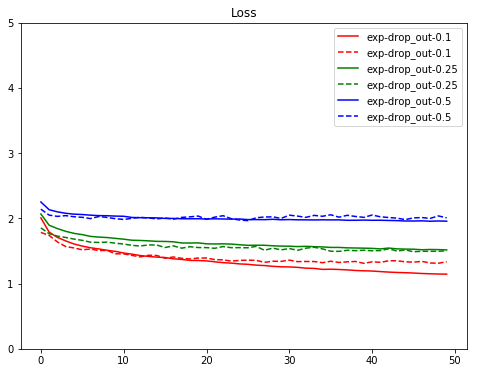

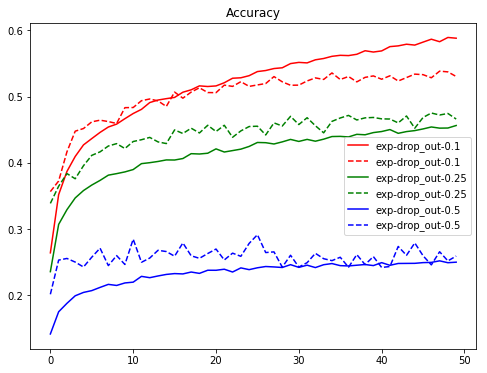

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()